write 444 results to dataset\adult_epsilon\20240613T211939.csv
-k 3 -r 0.5

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

file = Path("dataset/adult_epsilon//20240613T210203.csv")
df = pd.read_csv(file)
df["samples"] = df["samples"].astype("category")
df

,#trial,samples,#result,age,education-num
0,0,1024,0,35.0,14.0
1,0,1024,1,39.0,12.0
2,0,1024,2,67.0,8.0
3,0,512,0,7.0,8.0
4,0,512,1,9.0,6.0
...,...,...,...,...,...
751,98,256,1,18.0,9.0
752,98,256,2,19.0,4.0
753,99,1024,0,2.0,0.0
754,99,512,0,2.0,0.0


In [153]:
df["samples"].cat.categories

Index([256, 512, 1024], dtype='int64')

<Axes: xlabel='education-num', ylabel='age'>

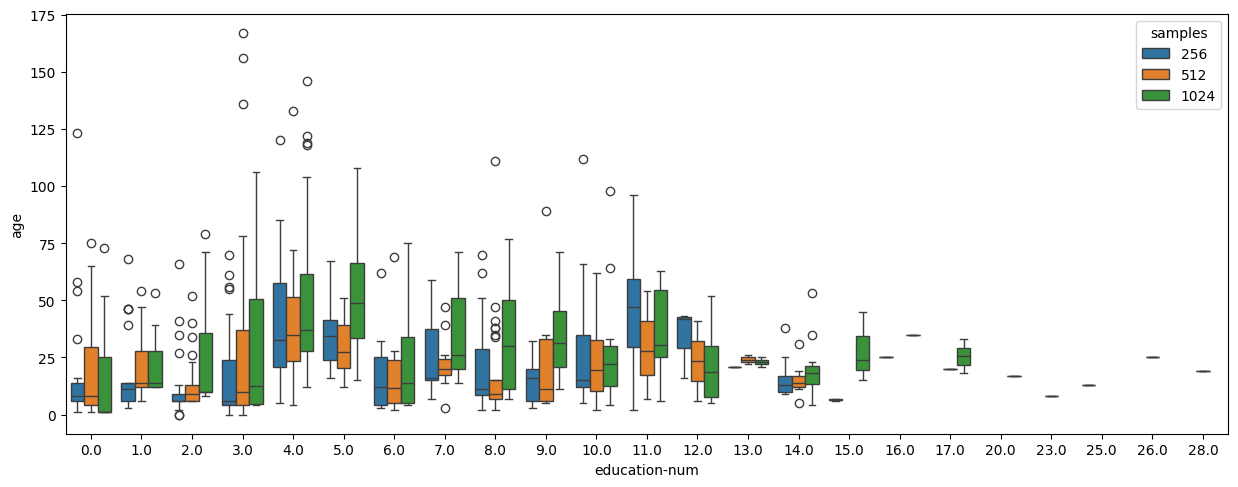

In [154]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15.0, 12.0))
ax = fig.add_subplot(211)
sns.boxplot(
    df,
    x="education-num",
    y="age",
    hue="samples",
    ax=ax,
)

<Axes: xlabel='education-num', ylabel='age'>

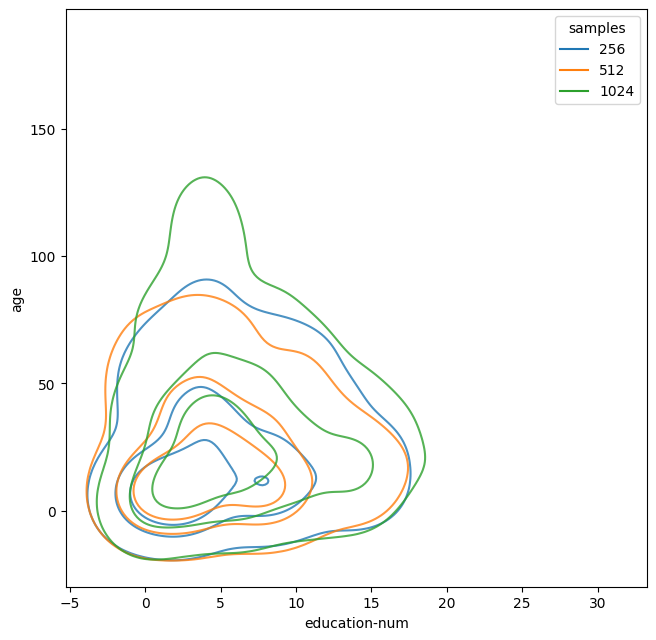

In [156]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot(111)

sns.kdeplot(
    df,
    x="education-num",
    y="age",
    hue="samples",
    ax=ax,
    alpha=0.8,
    levels=4,
)

# ax.set_xlim(right=7.0)

In [2]:
trials = range(df["#trial"].max() + 1)
samples = df["samples"].cat.categories
index = pd.MultiIndex.from_product([trials, samples], names=["#trial", "samples"])
index

MultiIndex([( 0,  256),
            ( 0,  512),
            ( 0, 1024),
            ( 1,  256),
            ( 1,  512),
            ( 1, 1024),
            ( 2,  256),
            ( 2,  512),
            ( 2, 1024),
            ( 3,  256),
            ...
            (96, 1024),
            (97,  256),
            (97,  512),
            (97, 1024),
            (98,  256),
            (98,  512),
            (98, 1024),
            (99,  256),
            (99,  512),
            (99, 1024)],
           names=['#trial', 'samples'], length=300)

In [15]:
X_edu = df.sort_values("education-num")
X_edu.drop_duplicates(["#trial", "samples"], keep="first", inplace=True)
X_edu.set_index(["#trial", "samples"], inplace=True)
X_edu = X_edu.reindex(index, fill_value=0)
X_edu.reset_index(inplace=True)
X_edu["samples"] = X_edu["samples"].astype("category")
X_edu

,#trial,samples,#result,age,education-num
0,0,256,0,5.0,3.0
1,0,512,3,25.0,4.0
2,0,1024,2,67.0,8.0
3,1,256,2,70.0,3.0
4,1,512,1,7.0,0.0
...,...,...,...,...,...
295,98,512,1,14.0,1.0
296,98,1024,0,1.0,0.0
297,99,256,0,2.0,0.0
298,99,512,0,2.0,0.0


In [14]:
X_age = df.sort_values("age")
X_age.drop_duplicates(["#trial", "samples"], keep="first", inplace=True)
X_age.set_index(["#trial", "samples"], inplace=True)
X_age.sort_index(inplace=True)
X_age = X_age.reindex(index, fill_value=0)
X_age.reset_index(inplace=True)
X_age["samples"] = X_age["samples"].astype("category")
X_age

,#trial,samples,#result,age,education-num
0,0,256,0,5.0,3.0
1,0,512,0,7.0,8.0
2,0,1024,0,35.0,14.0
3,1,256,0,3.0,6.0
4,1,512,0,2.0,6.0
...,...,...,...,...,...
295,98,512,0,10.0,6.0
296,98,1024,0,1.0,0.0
297,99,256,0,2.0,0.0
298,99,512,0,2.0,0.0


<Axes: xlabel='education-num', ylabel='Count'>

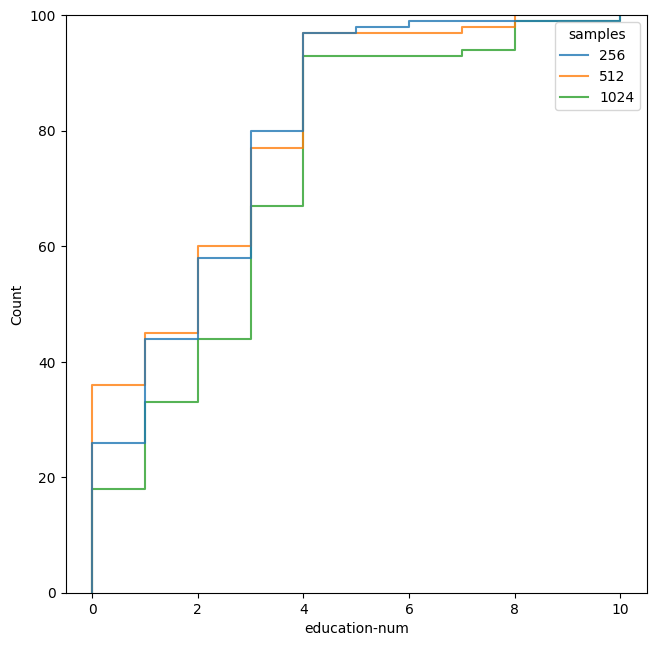

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot(111)

sns.ecdfplot(
    X_edu,
    x="education-num",
    hue="samples",
    stat="count",
    ax=ax,
    alpha=0.8,
)

# ax = fig.add_subplot(122)

# sns.ecdfplot(
#     X_age,
#     x="age",
#     hue="samples",
#     stat="count",
#     ax=ax,
#     alpha=0.8,
# )


<Axes: xlabel='education-num', ylabel='Count'>

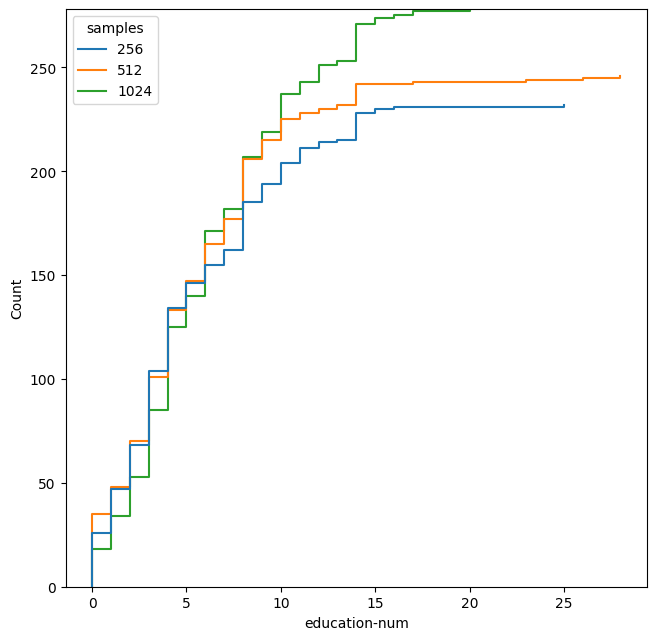

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot(111)

sns.ecdfplot(
    df,
    x="education-num",
    hue="samples",
    stat="count",
    ax=ax,
)